### Imports and options

In [65]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import feature_extraction, decomposition
from nltk.corpus import stopwords

In [54]:
pd.options.display.max_columns = 30
pd.options.display.max_rows = 230

### Opening pickled files

In [3]:
with open('episode_scripts_final.pkl','rb') as picklefile:
    episode_scripts = pickle.load(picklefile)

In [4]:
with open('episode_names_final.pkl','rb') as picklefile:
    episode_names = pickle.load(picklefile)

In [5]:
with open('episode_links_final.pkl','rb') as picklefile:
    episode_links = pickle.load(picklefile)

In [6]:
with open('episode_net_links_final.pkl','rb') as picklefile:
    net_links = pickle.load(picklefile)

### Making data frame

In [7]:
df = pd.DataFrame()
df['episode_name'] = pd.Series(episode_names)
df['script_link'] = pd.Series(episode_links)
df['netflix_link'] = pd.Series(net_links)
df['script'] = pd.Series(episode_scripts)

In [13]:
df

,episode_name,script_link,netflix_link,script
0,Episode 101: The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,https://www.netflix.com/watch/70273997?trackId...,ineapig\nAdditional transcribing by: Eric Aase...
1,Episode 102: The One With The Sonogram At the End,http://www.livesinabox.com/friends/season1/102...,https://www.netflix.com/watch/70273998?trackId...,"ineapig\n\n\n\n\n[Scene Central Perk, everyone..."
2,Episode 103: The One With The Thumb,http://www.livesinabox.com/friends/season1/103...,https://www.netflix.com/watch/70273999?trackId...,"ineapig\n\n\n\n\n[Scene: Central Perk, everyon..."
3,Episode 104: The One With George Stephanopoulos,http://www.livesinabox.com/friends/season1/104...,https://www.netflix.com/watch/70274000?trackId...,"ineapig\n\n\n\n\n[Scene: Central Perk, everyon..."
4,Episode 105: The One With The East German Laun...,http://www.livesinabox.com/friends/season1/105...,https://www.netflix.com/watch/70274001?trackId...,ndy Mattingly Phillips\nWith Minor Adjustments...
5,Episode 106: The One With The Butt,http://www.livesinabox.com/friends/season1/106...,https://www.netflix.com/watch/70274002?trackId...,"ineapig\n\n\n\n\n[Scene: A Theater, the gang i..."
6,Episode 107: The One With The Blackout,http://www.livesinabox.com/friends/season1/107...,https://www.netflix.com/watch/70274003?trackId...,"th Curran\n\n\n\n\n[Scene: Central Perk, Rache..."
7,Episode 108: The One Where Nana Dies Twice,http://www.livesinabox.com/friends/season1/108...,https://www.netflix.com/watch/70274004?trackId...,ineapig\nWith Help From: Rachel Stigge\n\n\n\n...
8,Episode 109: The One Where Underdog Gets Away,http://www.livesinabox.com/friends/season1/109...,https://www.netflix.com/watch/70274005?trackId...,ndy Mattingly Phillips\nWith Minor Adjustments...
9,Episode 110: The One With The Monkey,http://www.livesinabox.com/friends/season1/110...,https://www.netflix.com/watch/70274006?trackId...,"ineapig\n\n\n\n\n[Scene: Monica and Rachel's, ..."


In [16]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = feature_extraction.text.CountVectorizer(
    ngram_range=(1, 2),
    stop_words=['ross','rachel','monica','phoebe','joey','chandler'],
    token_pattern="\\b[a-z][a-z]+\\b",
    min_df=0.1,
)

In [17]:
counts = count_vectorizer.fit_transform(df['script'])

In [18]:
feature_names = count_vectorizer.get_feature_names()

In [19]:
print(f"""
number of features: {len(feature_names):,}
random set of features: {np.random.choice(feature_names, size=10)}
""")


number of features: 5,104
random set of features: ['deserve' 'think she' 'really oh' 'joins' 'minutes' 'it could' 'cards'
 'why don' 'hat' 'the apartment']



In [20]:
n_topics = 30

In [65]:
lda = decomposition.LatentDirichletAllocation(
    n_components=n_topics, 
    learning_method="online", 
    verbose=1, 
    max_iter=5, 
    n_jobs=-1
)

In [51]:
lda.fit(counts)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=20, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [21]:
# from http://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [53]:
print_top_words(lda, count_vectorizer.get_feature_names(), 10)

Topic #0: you the and to it that is oh what of
Topic #1: the you and to it is that in my this
Topic #2: the you and it to is know no are oh
Topic #3: the you to and that is it oh no on
Topic #4: you the to and that is it oh know we
Topic #5: you to the it that is oh know this no
Topic #6: you it the and is that to my in no
Topic #7: the to it and you my what that on in
Topic #8: you the to it and that are in know her
Topic #9: you the and it to is what know my oh
Topic #10: you it and the to that is oh know just
Topic #11: you the to and it that is oh in my
Topic #12: the you to it and what oh with is that
Topic #13: and the you it to that is of oh on
Topic #14: you the and it to is oh what no that
Topic #15: you the and it to that is in oh my
Topic #16: the you it and to what he in is oh
Topic #17: you and the that to is it oh me what
Topic #18: the and you to it that is of what in
Topic #19: you the and it to know is of oh this



In [113]:
def str_to_list(input_str):
    return input_str.split()

In [99]:
str_to_list('really mean come want')

['really', 'mean', 'come', 'want']

In [22]:
stop_words = stopwords.words('english')

In [23]:
stop_words += ['the','you','to','it','and', 'that','is','what','ok','oh','in','no','we','she','on','of','know',
               'okay','her','yeah','he','all','just','this', 'me', 'so', 'my', 'with', 'are', 're', 'don',
               'not', 'for','hey', 'well', 'right', 'like', 'get', 'scene', 'gonna', 'uh', 'one', 'look',
              'mrs', 'mr','go','think','back','see','got','really','really', 'mean', 'come', 'want']

In [24]:
friends = ['ross','rachel','monica','chandler','phoebe','joey']
stop_words += friends

In [25]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
tfidf_vectorizer = feature_extraction.text.TfidfVectorizer(stop_words = stop_words, min_df=0.1)

In [28]:
tfidf_freq = tfidf_vectorizer.fit_transform(df['script'])

In [29]:
tfidf_vectorizer.get_feature_names()

['10',
 '15',
 '20',
 '30',
 '50',
 'aasen',
 'able',
 'absolutely',
 'accent',
 'accept',
 'accident',
 'accidentally',
 'across',
 'act',
 'acting',
 'actor',
 'actual',
 'actually',
 'admit',
 'advice',
 'afraid',
 'afternoon',
 'age',
 'agent',
 'ago',
 'agree',
 'ah',
 'ahead',
 'ahh',
 'ahhh',
 'air',
 'airport',
 'alive',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'alright',
 'also',
 'although',
 'always',
 'amazing',
 'american',
 'angrily',
 'angry',
 'annoying',
 'another',
 'answer',
 'answering',
 'answers',
 'anybody',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'apart',
 'apartment',
 'apologize',
 'apparently',
 'appreciate',
 'approaches',
 'area',
 'arm',
 'arms',
 'around',
 'aside',
 'ask',
 'asked',
 'asking',
 'asleep',
 'ass',
 'assistant',
 'ate',
 'attention',
 'attractive',
 'audition',
 'aunt',
 'aw',
 'away',
 'awful',
 'awkward',
 'aww',
 'awww',
 'babies',
 'baby',
 'background',
 'backs',
 'bad',
 'bag',
 'bags',
 'balcony',
 'ball',
 'ba

In [94]:
lda = decomposition.LatentDirichletAllocation(
    n_components=n_topics, 
    learning_method="online", 
    verbose=1, 
    max_iter=5, 
    n_jobs=-1
)

In [95]:
lda.fit(tfidf_freq)

Process ForkPoolWorker-5:
Process ForkPoolWorker-12:
Process ForkPoolWorker-7:
Process ForkPoolWorker-11:
Process ForkPoolWorker-9:
Process ForkPoolWorker-4:
Process ForkPoolWorker-10:
Process ForkPoolWorker-13:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  F

KeyboardInterrupt: 

In [97]:
print_top_words(lda, tfidf_vectorizer.get_feature_names(), 10)

Topic #0: spade misery clapton abso watchin stub fumble streaking phoebeball lesson
Topic #1: aurora photography spaceship smells stilts promised joan tellyour met 1922
Topic #2: and to it that is what oh know in of
Topic #3: to and it that oh is so what no me
Topic #4: emily to finding carl ask judy daa inflatable bunnies orgy
Topic #5: to and it that oh what of is okay in
Topic #6: to and it that is what oh in know of
Topic #7: explanation dartmouth cufflinks spatters frowns handling iffy pleaaase puzzle sicker
Topic #8: and to it is oh that in eddie on know
Topic #9: and to it know that what okay just brussels yeah



In [31]:
nmf = decomposition.NMF(n_components=30)

In [32]:
tp = nmf.fit_transform(tfidf_freq)

In [40]:
tp.shape

(227, 30)

In [35]:
topic_nums = []
for i in range(0,30):
    topic_nums.append(f"Topic {i}")

In [36]:
topic_nums

['Topic 0',
 'Topic 1',
 'Topic 2',
 'Topic 3',
 'Topic 4',
 'Topic 5',
 'Topic 6',
 'Topic 7',
 'Topic 8',
 'Topic 9',
 'Topic 10',
 'Topic 11',
 'Topic 12',
 'Topic 13',
 'Topic 14',
 'Topic 15',
 'Topic 16',
 'Topic 17',
 'Topic 18',
 'Topic 19',
 'Topic 20',
 'Topic 21',
 'Topic 22',
 'Topic 23',
 'Topic 24',
 'Topic 25',
 'Topic 26',
 'Topic 27',
 'Topic 28',
 'Topic 29']

In [109]:
nmf_topic_dist = pd.DataFrame(tp,columns=topic_nums)

In [110]:
nmf_topic_dist

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
0,0.000000,0.000000,0.002719,0.019434,0.000000,0.000000,0.030289,0.165634,0.002294,0.000000,0.000015,0.013473,0.068839,0.018762,0.002945,0.018581,0.009729,0.017708,0.011157,0.393408,0.000000,0.000000,0.001329,0.000000,0.000000,0.001537,0.000000,0.018417,0.000000,0.026895
1,0.000000,0.000000,0.001553,0.450578,0.000140,0.162423,0.056944,0.021356,0.000000,0.000000,0.001647,0.001428,0.000000,0.000000,0.000000,0.004657,0.000000,0.000000,0.094484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018949,0.007055,0.000000
2,0.029042,0.002150,0.000680,0.000000,0.000000,0.000000,0.000000,0.248410,0.009913,0.006564,0.006210,0.000000,0.000000,0.013502,0.014864,0.064125,0.000000,0.000000,0.011406,0.016689,0.030730,0.052152,0.061455,0.000000,0.000000,0.017957,0.017307,0.012429,0.000000,0.000000
3,0.005936,0.000000,0.000000,0.080743,0.000000,0.010971,0.000000,0.199457,0.013121,0.004239,0.000000,0.000000,0.001182,0.004690,0.000000,0.119597,0.060725,0.000000,0.040084,0.000000,0.058196,0.001396,0.000000,0.000000,0.110589,0.000000,0.041327,0.000000,0.057212,0.000000
4,0.000000,0.000000,0.419354,0.006676,0.000000,0.000000,0.024031,0.029478,0.000000,0.000000,0.000000,0.008507,0.005973,0.050936,0.000000,0.026394,0.000000,0.007273,0.000000,0.104974,0.000000,0.000000,0.000000,0.097600,0.000000,0.000000,0.000000,0.044539,0.000000,0.000000
5,0.017736,0.000000,0.000281,0.000000,0.019345,0.000000,0.000000,0.258602,0.000000,0.000000,0.212025,0.000000,0.001041,0.000232,0.000000,0.049038,0.068585,0.000000,0.006082,0.074856,0.031956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000611,0.000000,0.010917,0.000000,0.000000,0.000479,0.107533,0.000000,0.000000,0.001746,0.363120,0.000000,0.000000,0.000000,0.057255,0.000000,0.000000,0.000000,0.078347,0.000000,0.000000,0.000000,0.000000,0.111681,0.000000,0.000000,0.003117,0.000000,0.000000
7,0.016305,0.000000,0.001874,0.012388,0.000000,0.450661,0.000000,0.032315,0.000000,0.000000,0.003735,0.000000,0.013637,0.014616,0.009640,0.045092,0.000000,0.009264,0.012353,0.030581,0.000000,0.000000,0.000000,0.000000,0.009389,0.000000,0.000876,0.023143,0.000000,0.000000
8,0.022108,0.000000,0.000000,0.357386,0.000000,0.004206,0.000000,0.003937,0.000000,0.012027,0.000000,0.006390,0.000000,0.033915,0.000000,0.000000,0.009352,0.000000,0.000000,0.000000,0.014976,0.000000,0.033610,0.046289,0.000000,0.054201,0.042956,0.022294,0.000000,0.041099
9,0.000000,0.016353,0.302075,0.010129,0.000000,0.000000,0.006346,0.164949,0.000000,0.000000,0.002555,0.010294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159318,0.000000,0.000000,0.000000,0.000000,0.126802,0.000000,0.041678,0.000392,0.001170,0.052563


In [114]:
df = df.join(nmf_topic_dist)

In [115]:
df

,episode_name,script_link,netflix_link,script,main_topic,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
0,Episode 101: The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,https://www.netflix.com/watch/70273997?trackId...,ineapig\nAdditional transcribing by: Eric Aase...,19,0.000000,0.000000,0.002719,0.019434,0.000000,0.000000,0.030289,0.165634,0.002294,0.000000,...,0.018581,0.009729,0.017708,0.011157,0.393408,0.000000,0.000000,0.001329,0.000000,0.000000,0.001537,0.000000,0.018417,0.000000,0.026895
1,Episode 102: The One With The Sonogram At the End,http://www.livesinabox.com/friends/season1/102...,https://www.netflix.com/watch/70273998?trackId...,"ineapig\n\n\n\n\n[Scene Central Perk, everyone...",3,0.000000,0.000000,0.001553,0.450578,0.000140,0.162423,0.056944,0.021356,0.000000,0.000000,...,0.004657,0.000000,0.000000,0.094484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018949,0.007055,0.000000
2,Episode 103: The One With The Thumb,http://www.livesinabox.com/friends/season1/103...,https://www.netflix.com/watch/70273999?trackId...,"ineapig\n\n\n\n\n[Scene: Central Perk, everyon...",7,0.029042,0.002150,0.000680,0.000000,0.000000,0.000000,0.000000,0.248410,0.009913,0.006564,...,0.064125,0.000000,0.000000,0.011406,0.016689,0.030730,0.052152,0.061455,0.000000,0.000000,0.017957,0.017307,0.012429,0.000000,0.000000
3,Episode 104: The One With George Stephanopoulos,http://www.livesinabox.com/friends/season1/104...,https://www.netflix.com/watch/70274000?trackId...,"ineapig\n\n\n\n\n[Scene: Central Perk, everyon...",7,0.005936,0.000000,0.000000,0.080743,0.000000,0.010971,0.000000,0.199457,0.013121,0.004239,...,0.119597,0.060725,0.000000,0.040084,0.000000,0.058196,0.001396,0.000000,0.000000,0.110589,0.000000,0.041327,0.000000,0.057212,0.000000
4,Episode 105: The One With The East German Laun...,http://www.livesinabox.com/friends/season1/105...,https://www.netflix.com/watch/70274001?trackId...,ndy Mattingly Phillips\nWith Minor Adjustments...,2,0.000000,0.000000,0.419354,0.006676,0.000000,0.000000,0.024031,0.029478,0.000000,0.000000,...,0.026394,0.000000,0.007273,0.000000,0.104974,0.000000,0.000000,0.000000,0.097600,0.000000,0.000000,0.000000,0.044539,0.000000,0.000000
5,Episode 106: The One With The Butt,http://www.livesinabox.com/friends/season1/106...,https://www.netflix.com/watch/70274002?trackId...,"ineapig\n\n\n\n\n[Scene: A Theater, the gang i...",7,0.017736,0.000000,0.000281,0.000000,0.019345,0.000000,0.000000,0.258602,0.000000,0.000000,...,0.049038,0.068585,0.000000,0.006082,0.074856,0.031956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Episode 107: The One With The Blackout,http://www.livesinabox.com/friends/season1/107...,https://www.netflix.com/watch/70274003?trackId...,"th Curran\n\n\n\n\n[Scene: Central Perk, Rache...",11,0.000000,0.000611,0.000000,0.010917,0.000000,0.000000,0.000479,0.107533,0.000000,0.000000,...,0.057255,0.000000,0.000000,0.000000,0.078347,0.000000,0.000000,0.000000,0.000000,0.111681,0.000000,0.000000,0.003117,0.000000,0.000000
7,Episode 108: The One Where Nana Dies Twice,http://www.livesinabox.com/friends/season1/108...,https://www.netflix.com/watch/70274004?trackId...,ineapig\nWith Help From: Rachel Stigge\n\n\n\n...,5,0.016305,0.000000,0.001874,0.012388,0.000000,0.450661,0.000000,0.032315,0.000000,0.000000,...,0.045092,0.000000,0.009264,0.012353,0.030581,0.000000,0.000000,0.000000,0.000000,0.009389,0.000000,0.000876,0.023143,0.000000,0.000000
8,Episode 109: The One Where Underdog Gets Away,http://www.livesinabox.com/friends/season1/109...,https://www.netflix.com/watch/70274005?trackId...,ndy Mattingly Phillips\nWith Minor Adjustments...,3,0.022108,0.000000,0.000000,0.357386,0.000000,0.004206,0.000000,0.003937,0.000000,0.012027,...,0.000000,0.0

In [51]:
main_topics = [np.argmax(row) for row in tp]

In [52]:
df['main_topic'] = main_topics

In [61]:
df[df['main_topic']==12]

,episode_name,script_link,netflix_link,script,main_topic
91,Episode 420: The One With All The Wedding Dreses,http://www.livesinabox.com/friends/season4/420...,https://www.netflix.com/watch/70274089?trackId...,"ic Aasen\n\n\n\n[Scene: Joey’s bedroom, he is ...",12
141,Episode 701: The One With Monica's Thunder,http://www.livesinabox.com/friends/season7/701...,https://www.netflix.com/watch/70274143?trackId...,"ic Aasen\n\n\n\n[Scene: Monica, Chandler, and ...",12
142,Episode 702: The One With Rachel's Book,http://www.livesinabox.com/friends/season7/702...,https://www.netflix.com/watch/70274144?trackId...,"ic Aasen\n\n\n\n[Scene: Monica, Chandler, and ...",12
157,Episode 717: The One With The Cheap Wedding Dress,http://www.livesinabox.com/friends/season7/717...,https://www.netflix.com/watch/70274159?trackId...,"ic Aasen\n\n\n\n[Scene: Central Perk, Monica, ...",12
160,Episode 720: The One With Rachel's Big Kiss,http://www.livesinabox.com/friends/season7/720...,https://www.netflix.com/watch/70274162?trackId...,"ic Aasen\n\n\n\n[Scene: Central Perk, Joey, Mo...",12
164,"Episode 801: The One After ""I Do""",http://www.livesinabox.com/friends/season8/801...,https://www.netflix.com/watch/70274167?trackId...,"ic Aasen\n\n\n\n[Scene: The Wedding Hall, Moni...",12
165,Episode 802: The One With The Red Sweater,http://www.livesinabox.com/friends/season8/802...,https://www.netflix.com/watch/70274168?trackId...,"ic Aasen\n\n\n\n[Scene: The Hotel Lobby, Rache...",12


In [38]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), 10)

Topic #0: roommate room apartment move guys love place moving great god
Topic #1: mike uhm apartment looks emma door good guy love room
Topic #2: janice woman um guy laugh bing going head hi said
Topic #3: carol susan um keys parents lesbian baby milk name hi
Topic #4: richard ya good apartment bedroom bye kids bed alright sorry
Topic #5: geller jack dad mom chair parents room aunt office boxes
Topic #6: dr doctor la room ow baby hospital babies eye father
Topic #7: alright mon guy um ya guys big sorry hi la
Topic #8: ben money carol baby singing audition give good guitar love
Topic #9: emma baby alright cake crying looks plate god going us
Topic #10: director accent audition dance movie great shower good bag play
Topic #11: cat ball singing la phone um ya god ow italian
Topic #12: wedding married dress picture woman going umm night pregnant parents
Topic #13: waiter date cheese restaurant chef tonight woman dinner good fire
Topic #14: ah gunther chick joke entering duck singing good p

In [41]:
def plot_topic_matrix(model,vectorizer_feature):
    ''' plots each topic with top words and percent%'''
    disp_topics = pd.DataFrame()
    prob_comp = model.components_ / model.components_.sum(axis=1)[:,np.newaxis]
    for topic_idx,topic in enumerate(prob_comp):
        top_indices = topic.argsort()[:-10 - 1:-1]
        top_words = [f"{vectorizer_feature[i]} {topic[i]:.1%}" for i in top_indices]
        disp_topics[f"Topic {topic_idx}"] = top_words
    return disp_topics

In [42]:
plot_topic_matrix(nmf,tfidf_vectorizer.get_feature_names())

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
0,roommate 1.2%,mike 12.7%,janice 12.1%,carol 9.6%,richard 16.2%,geller 9.5%,dr 8.7%,alright 3.5%,ben 11.6%,emma 6.9%,director 6.7%,cat 7.5%,wedding 4.0%,waiter 4.9%,ah 2.4%,phone 3.4%,green 9.1%,eric 7.5%,ring 7.0%,cut 2.7%,tickets 1.9%,office 1.4%,dog 5.1%,car 2.3%,birthday 4.6%,umm 1.9%,london 2.1%,rach 4.4%,tape 4.3%,christmas 4.2%
1,room 1.0%,uhm 1.9%,woman 0.8%,susan 8.6%,ya 0.9%,jack 1.9%,doctor 2.3%,mon 1.3%,money 0.9%,baby 2.3%,accent 1.1%,ball 1.3%,married 1.6%,date 1.3%,gunther 2.3%,listens 3.1%,baby 1.4%,candy 1.4%,duck 1.2%,la 1.2%,ball 1.7%,guy 1.0%,going 0.8%,sandwich 1.3%,party 4.4%,bag 0.6%,plane 1.0%,um 1.4%,joke 0.8%,grandmother 1.8%
2,apartment 1.0%,apartment 0.6%,um 0.8%,um 1.2%,good 0.9%,dad 1.8%,la 1.7%,guy 1.3%,carol 0.8%,alright 1.0%,audition 1.0%,singing 1.0%,dress 1.4%,cheese 1.2%,chick 0.9%,call 1.0%,dr 1.1%,bra 1.0%,marry 1.2%,door 0.9%,game 1.7%,umm 0.9%,time 0.8%,machine 1.2%,cake 1.1%,turkey 0.6%,flight 1.0%,list 1.1%,uhm 0.7%,presents 1.6%
3,move 0.9%,looks 0.6%,guy 0.7%,keys 0.8%,apartment 0.7%,mom 1.2%,room 1.3%,um 1.3%,baby 0.7%,cake 0.8%,dance 0.9%,la 0.9%,picture 0.9%,restaurant 1.0%,joke 0.7%,message 0.9%,card 1.1%,daughter 0.8%,guys 0.9%,bedroom 0.8%,play 1.5%,bing 0.8%,game 0.7%,keys 0.8%,guys 1.0%,ohh 0.6%,airport 0.9%,hi 1.0%,story 0.6%,dad 1.4%
4,guys 0.8%,emma 0.6%,laugh 0.6%,parents 0.7%,bedroom 0.7%,chair 1.1%,ow 1.2%,ya 0.9%,singing 0.7%,crying 0.8%,movie 0.7%,phone 0.7%,woman 0.9%,chef 0.7%,entering 0.7%,hello 0.7%,mother 0.8%,baby 0.8%,whoa 0.8%,ow 0.8%,win 1.5%,good 0.7%,hat 0.7%,message 0.7%,gunther 0.9%,good 0.6%,love 0.8%,god 1.0%,pizza 0.6%,cookies 1.3%
5,love 0.7%,door 0.5%,bing 0.5%,lesbian 0.6%,bye 0.6%,parents 0.9%,baby 1.2%,guys 0.8%,audition 0.7%,looks 0.7%,great 0.6%,um 0.7%,going 0.7%,tonight 0.6%,duck 0.7%,machine 0.7%,daddy 0.8%,woman 0.8%,party 0.7%,kiss 0.7%,guys 1.2%,assistant 0.7%,door 0.7%,drive 0.7%,sister 0.8%,couch 0.6%,going 0.8%,fun 0.9%,sex 0.6%,year 1.1%
6,place 0.7%,good 0.5%,going 0.5%,baby 0.6%,kids 0.6%,room 0.8%,hospital 1.0%,big 0.6%,give 0.6%,plate 0.6%,shower 0.6%,ya 0.6%,umm 0.6%,woman 0.6%,singing 0.6%,god 0.7%,king 0.8%,win 0.6%,tell 0.7%,god 0.7%,let 0.9%,boss 0.7%,big 0.7%,dry 0.7%,fun 0.8%,would 0.5%,babies 0.8%,computer 0.8%,questions 0.6%,others 1.0%
7,moving 0.7%,guy 0.5%,head 0.4%,milk 0.6%,bed 0.6%,aunt 0.8%,babies 0.9%,sorry 0.6%,good 0.6%,god 0.5%,good 0.6%,god 0.6%,night 0.6%,dinner 0.6%,good 0.6%,office 0.6%,bed 0.7%,wait 0.6%,little 0.7%,living 0.6%,cards 0.9%,baby 0.6%,food 0.7%,ride 0.7%,door 0.8%,entering 0.5%,doctor 0.8%,goin 0.8%,young 0.6%,present 0.9%
8,great 0.7%,love 0.5%,hi 0.4%,name 0.6%,alright 0.5%,office 0.6%,eye 0.8%,hi 0.6%,guitar 0.6%,going 0.5%,bag 0.5%,ow 0.6%,pregnant 0.6%,good 0.5%,play 0.6%,hangs 0.6%,father 0.7%,pink 0.6%,babies 0.7%,starts 0.6%,bowl 0.7%,chef 0.6%,take 0.6%,would 0.6%,um 0.7%,guy 0.4%,baby 0.8%,wait 0.7%,show 0.5%,cookie 0.8%
9,god 0.7%,room 0.5%,said 0.4%,hi 0.5%,sorry 0.5%,boxes 0.6%,father 0.7%,la 0.6%,love 0.6%,us 0.5%,play 0.5%,italian 0.6%,parents 0.6%,fire 0.5%,cause 0.5%,hi 0.6%,shower 0.7%,hi 0.6%,best 0.6%,room 0.6%,throws 0.6%,cooking 0.6%,guys 0.5%,going 0.6%,apartment 0.7%,pants 0.4%,tell 0.7%,enters 0.6%,fake 0.5%,boxes 0.7%


### Finding the best # of topics

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [44]:
SSEs = []
Sil_coefs_ = []
for k in range(2,30):
    km = KMeans(n_clusters=k)
    km.fit(tfidf_freq)
    labels = km.labels_
    Sil_coefs_.append(silhouette_score(tfidf_freq, labels, metric='cosine'))
    SSEs.append(km.inertia_)

In [45]:
Sil_coefs_

[0.10663226294837386,
 0.10417497299732577,
 0.11669347245895041,
 0.10744115138943354,
 0.1301390649851872,
 0.1191864766507409,
 0.12197050114775049,
 0.11147923804180829,
 0.12261272054218922,
 0.11436869706716245,
 0.13414057533976065,
 0.12008947220212751,
 0.11559074273668364,
 0.11385105426906834,
 0.12875025074356894,
 0.12508378424305433,
 0.12063012747803481,
 0.12179668265115633,
 0.11611088873937972,
 0.12112543631318191,
 0.11337307814679336,
 0.1245357569673439,
 0.10996927113859797,
 0.11830937719487036,
 0.1170283502819181,
 0.1272000838443152,
 0.1335977901568348,
 0.1282130336994558]

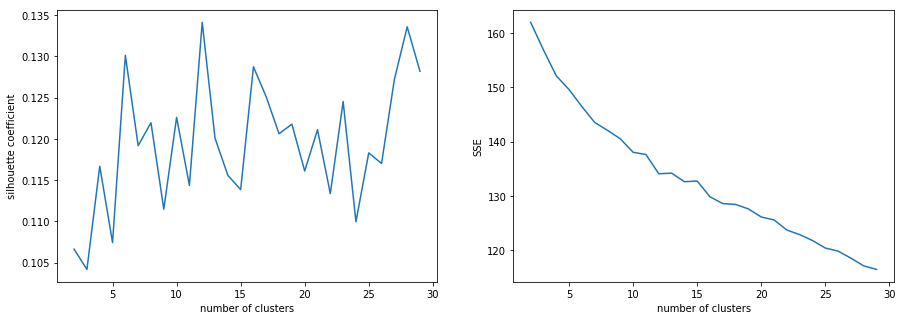

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,30)
ax1.plot(k_clusters, Sil_coefs_)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

24 looks like a good number of clusters to go with!

In [116]:
with open('friends_df.pkl','wb') as picklefile:
    pickle.dump(df,picklefile)

### TSNE

In [81]:
from sklearn.manifold import TSNE
import numpy as np
import time

In [82]:
n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(tp)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 227 samples in 0.000s...
[t-SNE] Computed neighbors for 227 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 227 / 227
[t-SNE] Mean sigma: 0.194870
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.163437
[t-SNE] Error after 300 iterations: 0.881201
t-SNE done! Time elapsed: 1.4047613143920898 seconds


In [98]:
df_tsne = tp.copy()

In [99]:
df_tsne

array([[0.        , 0.        , 0.00271897, ..., 0.01841736, 0.        ,
        0.02689462],
       [0.        , 0.        , 0.00155255, ..., 0.01894931, 0.00705506,
        0.        ],
       [0.02904164, 0.00215006, 0.00067953, ..., 0.01242866, 0.        ,
        0.        ],
       ...,
       [0.06683581, 0.02530477, 0.35930724, ..., 0.        , 0.01327351,
        0.0462927 ],
       [0.18807815, 0.03207591, 0.        , ..., 0.06448885, 0.02878652,
        0.03568893],
       [0.01882266, 0.07158659, 0.        , ..., 0.        , 0.        ,
        0.0253467 ]])

In [101]:
a = tsne_results[:,0]
b = tsne_results[:,1]

In [104]:
a.shape

(227,)

In [106]:
df_tsne['xtsne'] = list(a)
df_tsne['y-tsne'] = b

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [91]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [96]:
df_tsne.shape

(227, 30)

In [97]:
tsne_results[:,0].shape

(227,)

In [75]:
X = TSNE(n_components=2).fit_transform(tp)

In [76]:
X.shape

(227, 2)

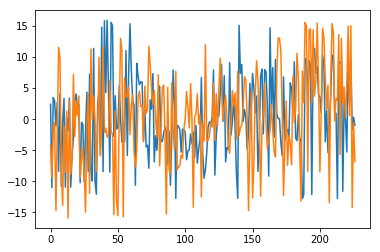

In [77]:
plt.plot(X)

In [120]:
len(tp[0])

30

In [123]:
topics = [f"Topic {i}" for i in range(30)]

In [124]:
topics

['Topic 0',
 'Topic 1',
 'Topic 2',
 'Topic 3',
 'Topic 4',
 'Topic 5',
 'Topic 6',
 'Topic 7',
 'Topic 8',
 'Topic 9',
 'Topic 10',
 'Topic 11',
 'Topic 12',
 'Topic 13',
 'Topic 14',
 'Topic 15',
 'Topic 16',
 'Topic 17',
 'Topic 18',
 'Topic 19',
 'Topic 20',
 'Topic 21',
 'Topic 22',
 'Topic 23',
 'Topic 24',
 'Topic 25',
 'Topic 26',
 'Topic 27',
 'Topic 28',
 'Topic 29']

In [128]:
from matplotlib import patches

In [132]:
tp

array([[0.        , 0.        , 0.00271897, ..., 0.01841736, 0.        ,
        0.02689462],
       [0.        , 0.        , 0.00155255, ..., 0.01894931, 0.00705506,
        0.        ],
       [0.02904164, 0.00215006, 0.00067953, ..., 0.01242866, 0.        ,
        0.        ],
       ...,
       [0.06683581, 0.02530477, 0.35930724, ..., 0.        , 0.01327351,
        0.0462927 ],
       [0.18807815, 0.03207591, 0.        , ..., 0.06448885, 0.02878652,
        0.03568893],
       [0.01882266, 0.07158659, 0.        , ..., 0.        , 0.        ,
        0.0253467 ]])

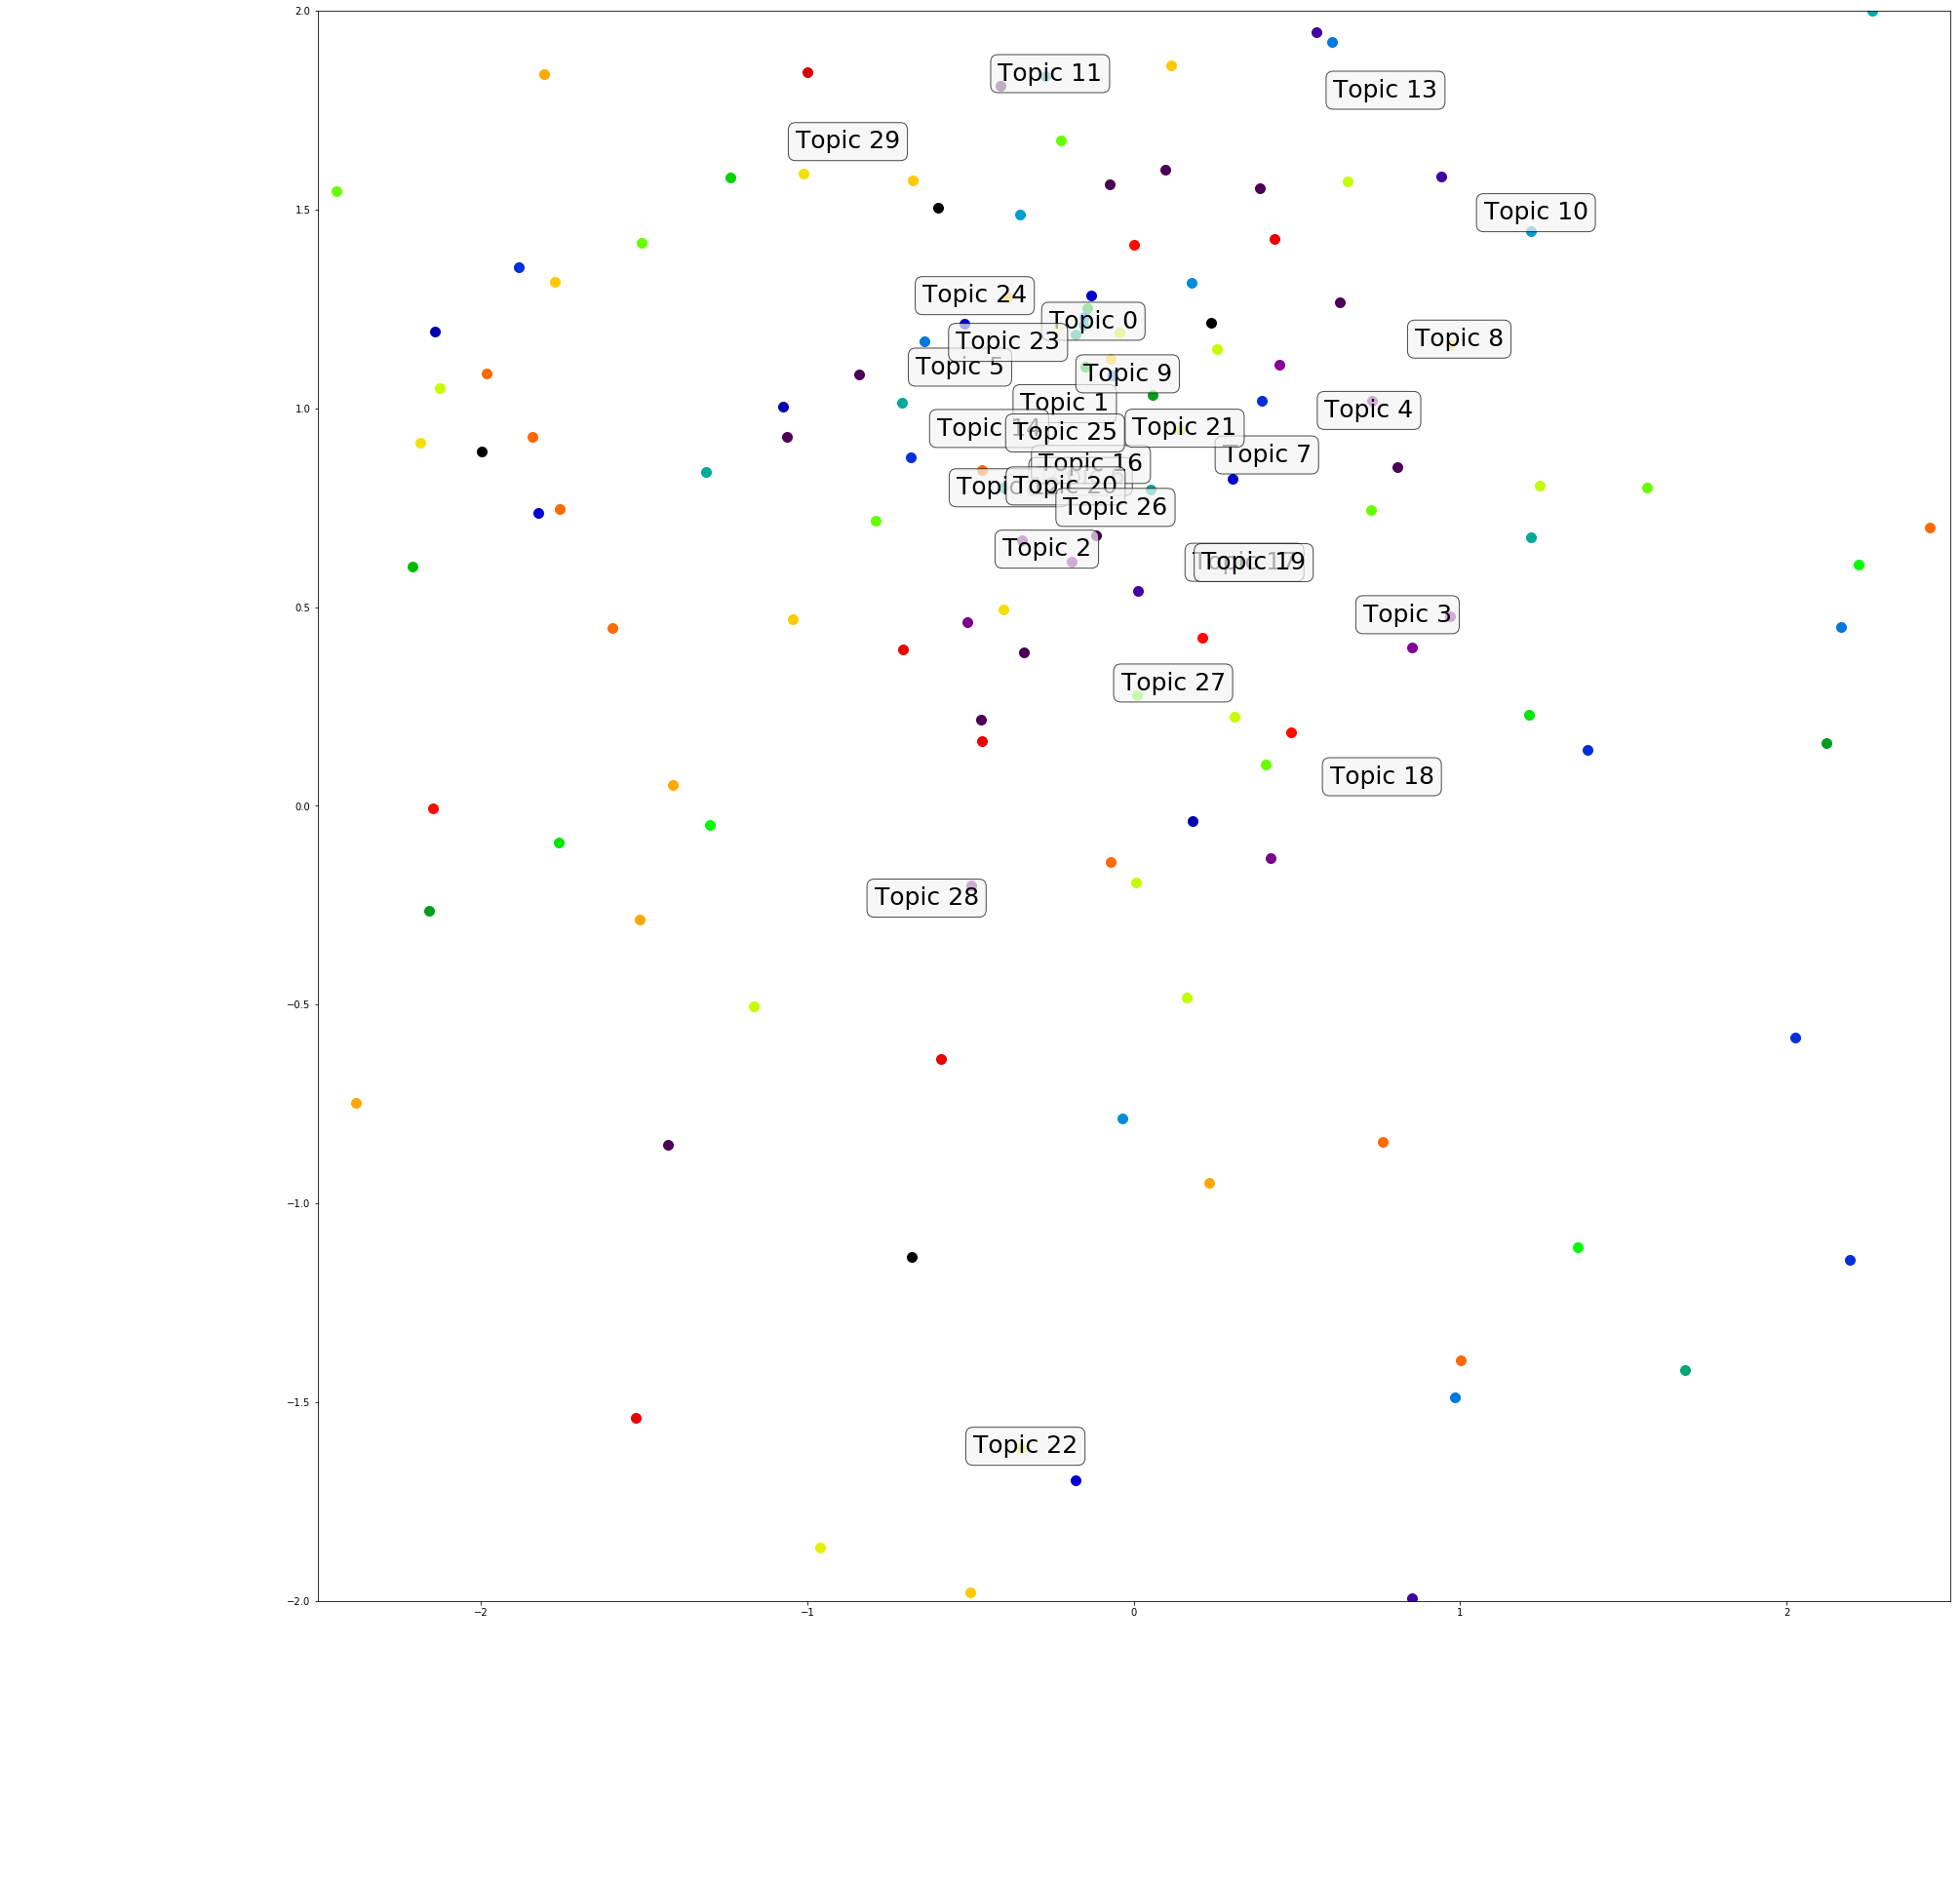

In [137]:
new_values = TSNE(metric='cosine',perplexity=50, n_components=2, n_iter=250).fit_transform(tp)
x = []
y = []
labels = []
num_topics = len(tp[0])
for value in new_values:
    x.append(value[0])
    y.append(value[1])

cmap = plt.cm.get_cmap('nipy_spectral')
cmapScale = int(cmap.N / num_topics)
plt.figure(figsize=(30, 30),facecolor='white')
labels = [] 
for i in range(len(x)):
    label = np.argmax(tp[i])
    labels.append(label)
    plt.scatter(x[i],y[i], c=cmap(label*cmapScale),s=100)

color_legend = []
for i in range(num_topics):
    boolArr = np.array(labels) == i
    x_avg = np.median(np.array(x)[boolArr])
    y_avg = np.median(np.array(y)[boolArr])
    plt.annotate(topics[i],
                 xy=(x_avg, y_avg),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='center',
                 va='center',
                 fontsize=25,
                 bbox=dict(boxstyle="round", fc="whitesmoke",alpha=0.7))
    color_legend.append(patches.Patch(color=cmap(i*cmapScale), label=f'Topic #{i+1}: {topics[i]}'))
# plt.legend(handles=color_legend,fontsize=18)
#plt.axis('off')
plt.xlim(-2.5,2.5)
plt.ylim(-2,2)
plt.show()